In [1]:
import itertools
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
file_path = r'C:\Users\RAVI\Desktop\test.csv'

In [4]:
df_germany = pd.read_csv(file_path)

In [5]:
df_germany.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [6]:
df_germany.set_index(pd.to_datetime(df_germany.date, format="%Y-%m"), drop=True, inplace=True)
df_germany.drop('date', axis=1, inplace=True)

In [7]:
df_germany.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,20.0
2017-08-16,3000889,1,BABY CARE,1.0
2017-08-16,3000890,1,BEAUTY,8.0
2017-08-16,3000891,1,BEVERAGES,560.0
2017-08-16,3000892,1,BOOKS,1.0


In [8]:

df_germany.shape

(28512, 4)

In [9]:
count_nan = len(df_germany) - df_germany.count()
count_nan

id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [10]:
df_germany = df_germany.sort_index()

In [11]:
df_germany.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,118.212121
std,8.230850e+03,15.586057,240.272972
min,3.000888e+06,1.000000,1.000000
25%,3.008016e+06,14.000000,14.000000
50%,3.015144e+06,27.500000,29.000000
75%,3.022271e+06,41.000000,90.000000
max,3.029399e+06,54.000000,1277.000000


In [12]:
df_germany.tail(10)

,id,store_nbr,family,onpromotion
date,,,,
2017-08-31,3029390,9,MAGAZINES,6.0
2017-08-31,3029391,9,MEATS,82.0
2017-08-31,3029392,9,PERSONAL CARE,148.0
2017-08-31,3029393,9,PET SUPPLIES,14.0
2017-08-31,3029394,9,PLAYERS AND ELECTRONICS,17.0
2017-08-31,3029395,9,POULTRY,54.0
2017-08-31,3029396,9,PREPARED FOODS,10.0
2017-08-31,3029397,9,PRODUCE,302.0
2017-08-31,3029398,9,SCHOOL AND OFFICE SUPPLIES,15.0


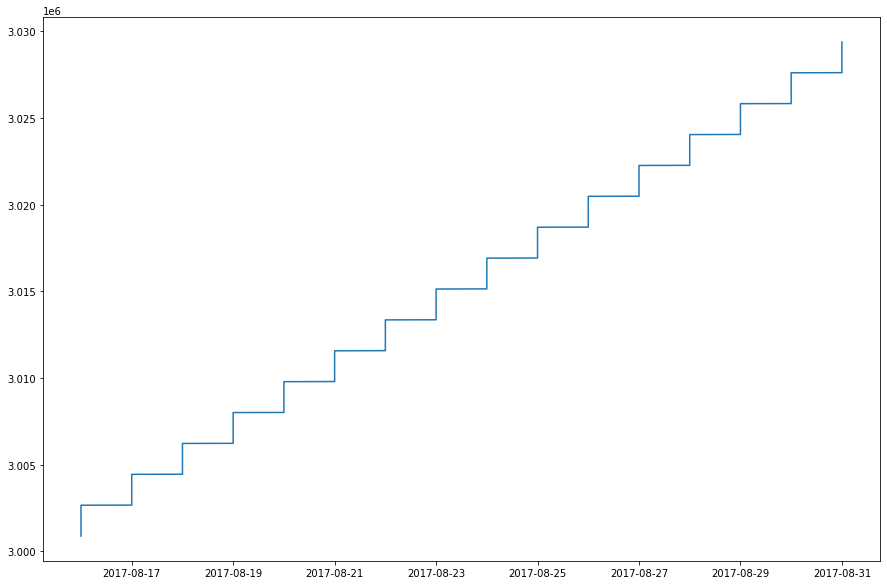

In [13]:
plt.plot(df_germany.id)

In [14]:
def stationarity_check(ts):
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

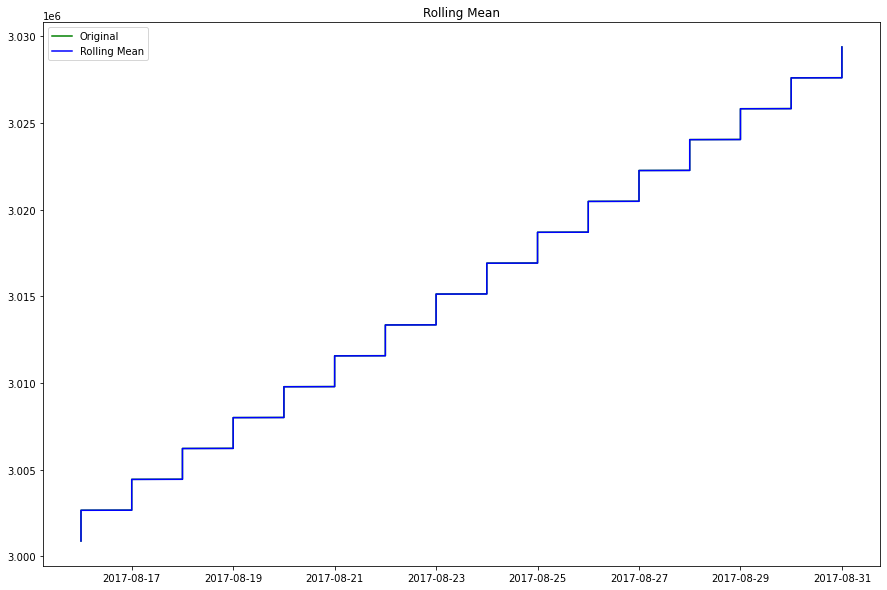

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                     1.131145
p-value                            0.995474
#Lags Used                        18.000000
Number of Observations Used    28493.000000
dtype: float64
Test Statistic                     1.131145
p-value                            0.995474
#Lags Used                        18.000000
Number of Observations Used    28493.000000
Critical Value (1%)               -3.430580
Critical Value (5%)               -2.861641
Critical Value (10%)              -2.566824
dtype: float64


In [15]:
stationarity_check(df_germany.id)

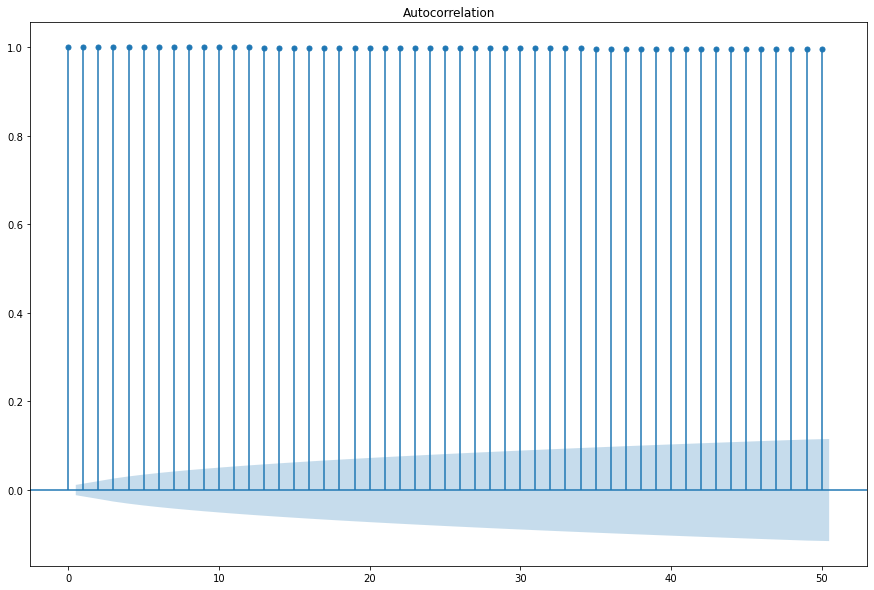

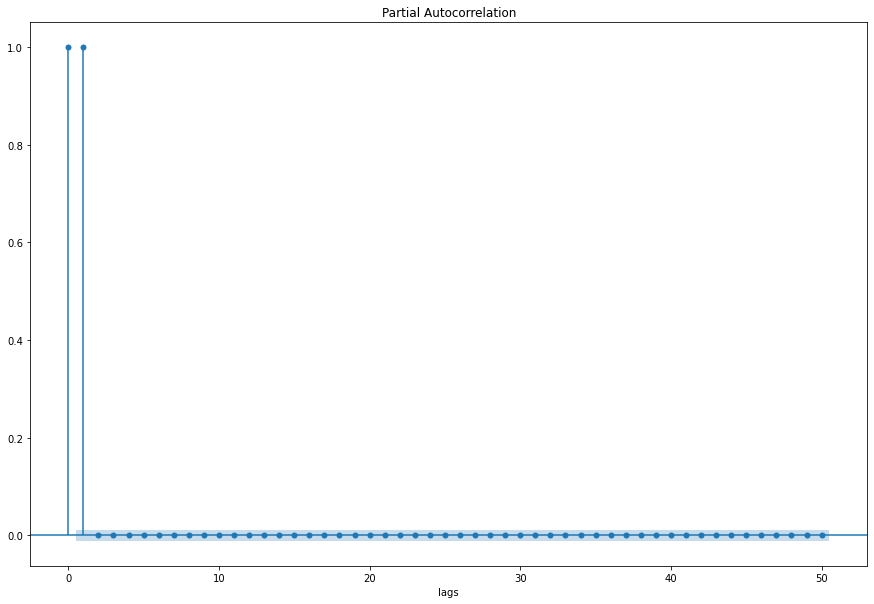

In [16]:
plot_acf(df_germany.id, lags=50)
plot_pacf(df_germany.id, lags=50)
plt.xlabel('lags')
plt.show()

In [17]:
ts_log = np.log(df_germany['id'])

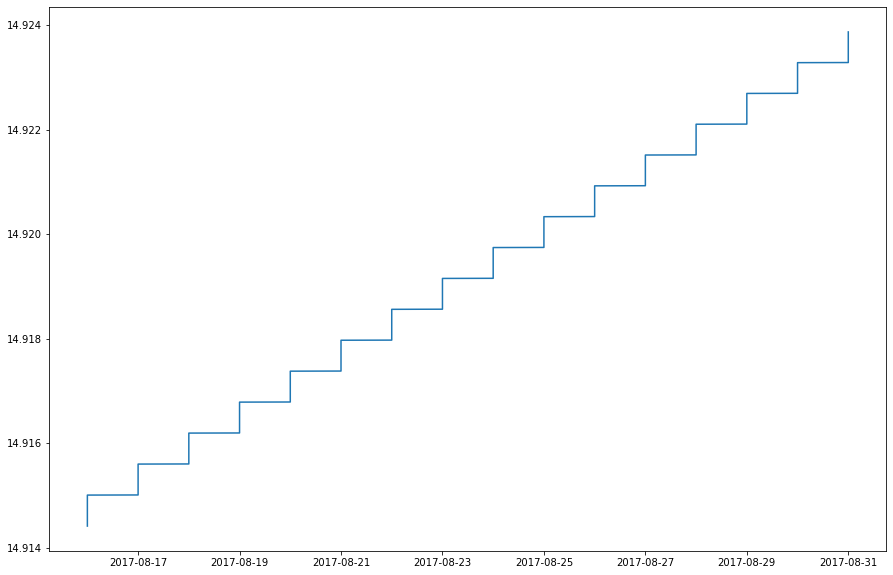

In [18]:

plt.plot(ts_log)

In [19]:
ts_log_diff = ts_log - ts_log.shift()

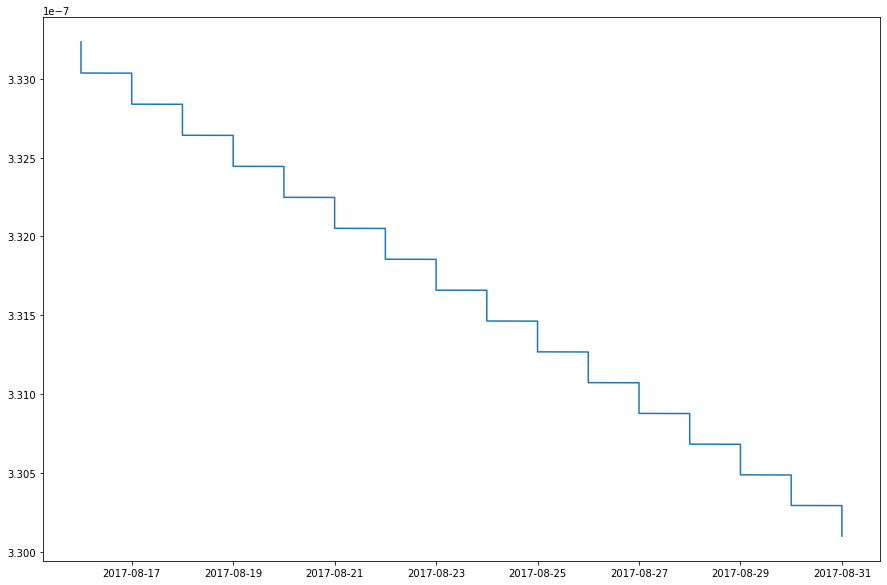

In [20]:

plt.plot(ts_log_diff)

In [21]:
ts_log_diff.dropna(inplace=True)

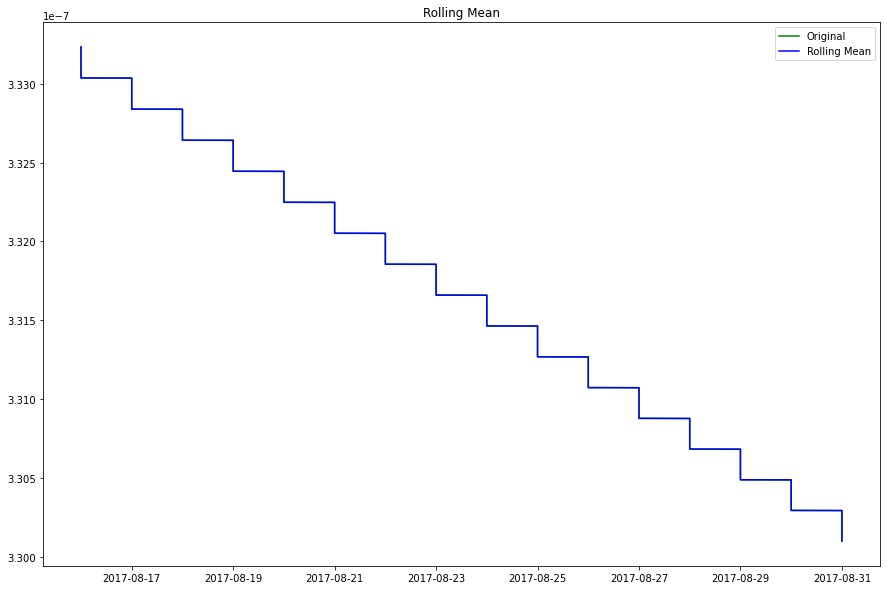

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                  -162.663387
p-value                            0.000000
#Lags Used                         1.000000
Number of Observations Used    28509.000000
dtype: float64
Test Statistic                  -162.663387
p-value                            0.000000
#Lags Used                         1.000000
Number of Observations Used    28509.000000
Critical Value (1%)               -3.430579
Critical Value (5%)               -2.861641
Critical Value (10%)              -2.566824
dtype: float64


In [22]:
stationarity_check(ts_log_diff)

In [1]:
p = q = range(1, 4)
print (p)

range(1, 4)


In [ ]:
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(ts_log_diff,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue
p = q = range(0, 4)
r = range(0,2)
pqr = itertools.product(p, r, q)
for param in pqr:
    try:
        mod = ARIMA(ts_log_diff,order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{} - MSE:{}'.format(param, results.aic, np.sum(np.square(results.resid))))
    except:
        continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(ts_log_diff,
                                order = (1, 1, 0),
                                seasonal_order= (0,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
residuals = results.resid

In [ ]:
h, pV, Q, cV = lbqtest(residuals, range(1, 20), alpha=0.1)
print ('lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))